### **Dataset of depressive posts in Russian language collected from social media** [(paper)](https://www.sciencedirect.com/science/article/pii/S2352340920300895)

Скачать датасет в формате .tsv можно [здесь](https://yadi.sk/d/G5rq-R3AK8SOuw).


In [ ]:
from google.colab import drive
drive.mount('gdrive')

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/My Drive

/content/gdrive/My Drive


In [ ]:
!ls

 depression_data.tsv
 Tout_va_bien_1_livre_de_l_eleve.pdf
'Слайд-шоу PowerPoint  -  Сов. и несов. вид 21.02.2019 13_36_56.mp4'


In [ ]:
import pandas as pd

df = pd.read_csv("depression_data.tsv", sep="\t")
df.head()

,text,label,age
0,"Когда-то я был добрым романтиком, который стре...",1,32.0
1,Здраствуйте! Я каждый день просыпаюсь с мыслью...,1,28.0
2,У меня проблемы с девушкой. Каждую ссору я не ...,1,16.0
3,"Вся моя жизнь это один сплошной ад, в котором ...",1,32.0
4,Я хочу уснуть и не проснуться.каждый день одно...,1,14.0


### Часть 1: Простая статистика


Зачастую в данных, с которыми вы работаете, может быть много неприятных для обработки вещей. Например, мы видим, что в колонке ```age``` очень грязные значения.

In [ ]:
df["age"].value_counts()

16.0      1823
17.0      1811
18.0      1661
15.0      1582
20.0      1543
          ... 
116.0        1
295.0        1
2425.0       1
92.0         1
830.0        1
Name: age, Length: 128, dtype: int64

1. Найдите среднее значение возраста в диапазоне от 14 до 50 лет включительно.

In [ ]:
# your code and output here
df.loc[(df['age'] >= 14) & (df['age'] <= 50)]['age'].mean()

22.704171601526518

2. Какую долю 16-летние авторы составляют в диапазоне от 16 до 26 лет включительно?

In [ ]:
# your code and output here
len(df.loc[df['age'] == 16]) / len(df.loc[(df['age'] >= 16) & (df['age'] <= 26)])

0.1259412780656304

3. Сколько в датасете текстов, авторам которых 28 или 30 лет?

In [ ]:
# your code and output here
len(df.loc[(df['age'] == 28) | (df['age'] == 30)])

1185

4. С помощью одной встроенной в ```pandas``` функции отобразите всю статистику по колонке ```age``` в диапазоне от 18 до 30 лет включительно.

In [ ]:
# your code and output here
df.loc[(df['age'] >= 18) & (df['age'] <= 30)].describe()

,label,age
count,13205.0,13205.000000
mean,1.0,22.676638
std,0.0,3.550254
min,1.0,18.000000
25%,1.0,20.000000
50%,1.0,22.000000
75%,1.0,25.000000
max,1.0,30.000000


5. Сколько в датасете положительных / отрицательных примеров?

In [ ]:
# your code and output here
print('Положительных:', len(df.loc[df['label'] == 1]))
print('Отрицательных:', len(df.loc[df['label'] == 0]))

Положительных: 32018
Отрицательных: 32021


### Часть 2: Предобработка

1. Посчитайте количество предложений в каждом тексте. Сохраните эти значения в отдельной колонке датафрейма.

In [ ]:
! pip install razdel

In [ ]:
# your code and output here
from razdel import sentenize, tokenize

def get_num_sentences(text):
    segmented_sentences = sentenize(text)
    num_sentences = len(list(segmented_sentences))
    return num_sentences

df['num_sents'] = df['text'].apply(get_num_sentences)

In [ ]:
df.head()

,text,label,age,num_sents
0,"Когда-то я был добрым романтиком, который стре...",1,32.0,15
1,Здраствуйте! Я каждый день просыпаюсь с мыслью...,1,28.0,6
2,У меня проблемы с девушкой. Каждую ссору я не ...,1,16.0,10
3,"Вся моя жизнь это один сплошной ад, в котором ...",1,32.0,5
4,Я хочу уснуть и не проснуться.каждый день одно...,1,14.0,18


2. Напишите функцию для токенизации текста. Удалите стоп-слова.

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# your code and output here
from nltk.corpus import stopwords
from string import punctuation

russian_stopwords = stopwords.words("russian")

def tokenize_text(text):
    tokens = tokenize(text.lower())
    result = [token.text for token in tokens 
              if token.text not in russian_stopwords
              and token.text not in punctuation + '«»—–...']
                
    return result

3. Посчитайте количество токенов в тексте (без стоп-слов). Найдите среднее этих значений как по всей выборке, так и внутри каждого класса. 

In [ ]:
# your code and output here
def get_tokens(text):
    tokens = tokenize_text(text)
    return tokens

In [ ]:
df['tokens'] = df['text'].apply(get_tokens)

In [ ]:
df.head()

,text,label,age,num_sents,tokens
0,"Когда-то я был добрым романтиком, который стре...",1,32.0,15,"[когда-то, добрым, романтиком, который, стреми..."
1,Здраствуйте! Я каждый день просыпаюсь с мыслью...,1,28.0,6,"[здраствуйте, каждый, день, просыпаюсь, мыслью..."
2,У меня проблемы с девушкой. Каждую ссору я не ...,1,16.0,10,"[проблемы, девушкой, каждую, ссору, могу, пере..."
3,"Вся моя жизнь это один сплошной ад, в котором ...",1,32.0,5,"[вся, жизнь, это, сплошной, ад, котором, горю,..."
4,Я хочу уснуть и не проснуться.каждый день одно...,1,14.0,18,"[хочу, уснуть, проснуться, каждый, день, одно,..."


In [ ]:
df['num_tokens'] = df['tokens'].apply(lambda x: len(list(x)))

In [ ]:
df.head()

,text,label,age,num_sents,tokens,num_tokens
0,"Когда-то я был добрым романтиком, который стре...",1,32.0,15,"[когда-то, добрым, романтиком, который, стреми...",157
1,Здраствуйте! Я каждый день просыпаюсь с мыслью...,1,28.0,6,"[здраствуйте, каждый, день, просыпаюсь, мыслью...",64
2,У меня проблемы с девушкой. Каждую ссору я не ...,1,16.0,10,"[проблемы, девушкой, каждую, ссору, могу, пере...",43
3,"Вся моя жизнь это один сплошной ад, в котором ...",1,32.0,5,"[вся, жизнь, это, сплошной, ад, котором, горю,...",25
4,Я хочу уснуть и не проснуться.каждый день одно...,1,14.0,18,"[хочу, уснуть, проснуться, каждый, день, одно,...",199


In [ ]:
df['num_tokens'].mean()

109.70428957354112

In [ ]:
df[df['label'] == 0]['num_tokens'].mean()

148.15995752787234

In [ ]:
df[df['label'] == 1]['num_tokens'].mean()

71.24501842713474

4. Напишите функцию, которая переводит текст в последовательность лемм.

In [ ]:
! pip install pymorphy2

In [ ]:
from pymorphy2 import MorphAnalyzer

morph = MorphAnalyzer()

In [ ]:
# your code and output here
def lemmatize_text(text):
    lemmas = []
    for word in tokenize_text(text):
        lemmas.append(morph.parse(word)[0].normal_form)
    return lemmas

In [ ]:
lemmatize_text(df['text'][0])[:20]

['когда-то',
 'добрый',
 'романтик',
 'который',
 'стремиться',
 'помочь',
 'весь',
 'попросить',
 'жалко',
 'верить',
 'человечность',
 'однако',
 'это',
 'фальший',
 'суррогатный',
 'дружба',
 'какой-то',
 'непонятный',
 'отношение',
 'девушка']

5. Напишите функцию, которая переводит текст в последовательность частеречных тегов.

In [ ]:
# your code and output here
def text_to_pos(text):
    pos_tags = []
    for word in tokenize_text(text):
        pos_tags.append(morph.parse(word)[0].tag.POS)
    return pos_tags

In [ ]:
text_to_pos(df['text'][0])[:20]

['ADVB',
 'ADJF',
 'NOUN',
 'ADJF',
 'VERB',
 'INFN',
 'ADJF',
 'VERB',
 'ADVB',
 'VERB',
 'NOUN',
 'CONJ',
 'PRCL',
 'NOUN',
 'ADJF',
 'NOUN',
 'ADJF',
 'ADJF',
 'NOUN',
 'NOUN']

6. Какие слова мы можем добавить в список стоп-слов? Приведите примеры и объясните, почему.

Из следующих частотных словарей для выборочных примеров видно, что такие слова как "это", "который", "стать", "быть" являются довольно часто используемыми и более-менее бесполезными для понимания тональности текста словами, поэтому их бы я добавила в список стоп-слов. В отличие от, например, часто употребляемых "часто", "мочь", "год", "сказать" и др., которые, по-моему, вносят гораздо больше смысла в рамках нашей тематики, поэтому их можно оставить.

In [ ]:
from collections import Counter

In [ ]:
for i in range(10):
    print(Counter(lemmatize_text(df['text'][i])).most_common()[:10])

[('это', 7), ('который', 4), ('часто', 4), ('мой', 4), ('именно', 4), ('потерять', 3), ('свой', 3), ('девушка', 2), ('любить', 2), ('попросту', 2)]
[('заканчиваться', 2), ('барахтаться', 2), ('здраствовать', 1), ('каждый', 1), ('день', 1), ('просыпаться', 1), ('мысль', 1), ('жить', 1), ('дизнь', 1), ('пустой', 1)]
[('мочь', 2), ('очень', 2), ('виноватый', 2), ('снова', 2), ('ситуация', 2), ('проблема', 1), ('девушка', 1), ('каждый', 1), ('ссора', 1), ('перенести', 1)]
[('это', 2), ('который', 2), ('отец', 2), ('весь', 1), ('жизнь', 1), ('сплошной', 1), ('ад', 1), ('горе', 1), ('постоянно', 1), ('устать', 1)]
[('нога', 6), ('хотеть', 5), ('сказать', 5), ('родитель', 5), ('время', 4), ('школа', 4), ('кость', 4), ('ходить', 4), ('гипс', 4), ('апрель', 3)]
[('должный', 6), ('истерика', 5), ('сын', 5), ('стать', 4), ('муж', 4), ('ребёнок', 3), ('год', 3), ('просто', 3), ('день', 3), ('это', 3)]
[('разослать', 3), ('мой', 2), ('лицо', 2), ('тело', 2), ('это', 2), ('хотеть', 2), ('шантажирова

In [ ]:
for i in range(60, 70):
    print(Counter(lemmatize_text(df['text'][i])).most_common()[:10])

[('время', 2), ('думать', 2), ('здравствуйте', 1), ('!!!', 1), ('знать', 1), ('начать', 1), ('просто', 1), ('устать', 1), ('жизнь', 1), ('работа', 1)]
[('постоянно', 1), ('появляться', 1), ('мысль', 1), ('суецида', 1), ('каждый', 1), ('разом', 1), ('сильный', 1)]
[('жена', 3), ('унижение', 2), ('мочь', 2), ('мой', 2), ('ребёнок', 2), ('так', 2), ('уважение', 1), ('постоянный', 1), ('оскорбление', 1), ('упрёк', 1)]
[('больно', 3), ('хотеть', 3), ('молиться', 2), ('поддержать', 2), ('папа', 2), ('боль', 2), ('страдать', 1), ('стать', 1), ('нужный', 1), ('муж', 1)]
[('деньга', 4), ('взять', 4), ('день', 2), ('проиграть', 2), ('прийтись', 2), ('вернуть', 2), ('снова', 2), ('30.000', 2), ('друг', 2), ('заём', 2)]
[('стать', 7), ('год', 6), ('школа', 5), ('начать', 5), ('быть', 5), ('знать', 4), ('друг', 4), ('хотеть', 4), ('класс', 4), ('5', 4)]
[('это', 8), ('всё', 7), ('класс', 6), ('просто', 6), ('так', 6), ('мочь', 6), ('хотя', 5), ('человек', 5), ('плохой', 5), ('мой', 5)]
[('часто', 4

### Часть 3: Визуализация


1. Визуализируйте распределение количество предложений / текст.

In [ ]:
import matplotlib.pyplot as plt

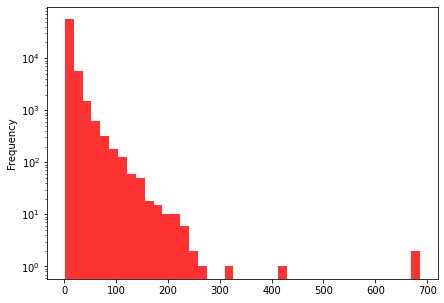

In [ ]:
plt.figure(figsize=(7, 5))
df['num_sents'].plot.hist(bins=40, alpha=0.8, logy=True, color='red')

2. Визуализируйте распределение количество-предложений / текст внутри каждого класса.

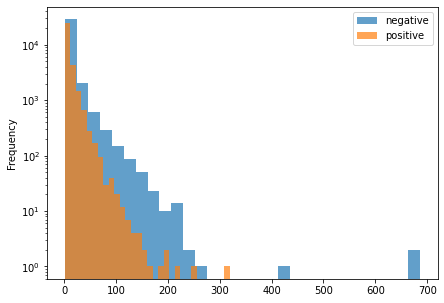

In [ ]:
# your code and output here
plt.figure(figsize=(7, 5))
df[df['label'] == 0]['num_sents'].plot.hist(bins=30, alpha=0.7, logy=True, label='negative', legend=True)
df[df['label'] == 1]['num_sents'].plot.hist(bins=30, alpha=0.7, logy=True, label='positive', legend=True)
plt.show()

3. Верно ли, что количество предложений в тексте коррелирует с возрастом автора в подвыборке от 16 до 32 лет включительно? Если да, какая это корреляция – положительная или отрицательная? Визуализируйте матрицу корреляции.

In [ ]:
# your code and output here
df_age = df[(df['age'] >= 16) & (df['age'] <= 32)]

In [ ]:
df_age[['age', 'num_sents']].corr()

,age,num_sents
age,1.000000,0.039831
num_sents,0.039831,1.000000


Корреляция минимальна, положительная (0.04)

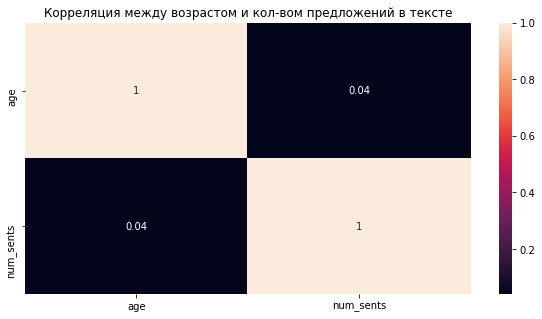

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 5))

sns.heatmap(
    data=df_age[['age', 'num_sents']].corr(), 
    annot=True,
    ax=ax
)

plt.title("Корреляция между возрастом и кол-вом предложений в тексте")
plt.show()

### Часть 4: Извлечение текстовых признаков

1. Самостоятельно реализуйте функцию для получения посимвольных н-грамм (без использования библиотек).

In [ ]:
# your code and output here
def char_ngrams(text, n=3):
    ngrams = []
    text = ' '.join(tokenize_text(text))
    for i in range(len(text)):
        ngram = text[i:i+n]
        if len(ngram) == n:
            ngrams.append(ngram)
    return ngrams

In [ ]:
# пример работы функции

text = "уставшая мама мыла грязную раму"

char_ngrams(text, n=3)[-10:]

['гря', 'ряз', 'язн', 'зну', 'ную', 'ую ', 'ю р', ' ра', 'рам', 'аму']

2. Самостоятельно реализуйте функцию для получения пословных н-грамм (без использования библиотек).

In [ ]:
# your code and output here
def word_ngrams(text, n=3):
    ngrams = []
    tokens = tokenize_text(text)
    for i in range(len(tokens)):
        ngram = tokens[i:i+n]
        if len(ngram) == n:
            ngrams.append(ngram)
    return ngrams

In [ ]:
# пример работы функции

word_ngrams(text, n=3)

[['уставшая', 'мама', 'мыла'],
 ['мама', 'мыла', 'грязную'],
 ['мыла', 'грязную', 'раму']]

In [ ]:
word_ngrams(text, n=4)

[['уставшая', 'мама', 'мыла', 'грязную'], ['мама', 'мыла', 'грязную', 'раму']]

3. Самостоятельно реализуйте функцию для получения н-грамм лемм (без использования библиотек).

In [ ]:
# your code and output here
def lemma_ngrams(text, n=3):
    ngrams = []
    lemmas = lemmatize_text(text)
    for i in range(len(lemmas)):
        ngram = lemmas[i:i+n]
        if len(ngram) == n:
            ngrams.append(ngram)
    return ngrams

In [ ]:
# пример работы функции

lemma_ngrams(text, n=3)

[['устать', 'мама', 'мыло'],
 ['мама', 'мыло', 'грязный'],
 ['мыло', 'грязный', 'рама']]

In [ ]:
lemma_ngrams(text, n=4)

[['устать', 'мама', 'мыло', 'грязный'], ['мама', 'мыло', 'грязный', 'рама']]

4. Самостоятельно реализуйте функцию для получения н-грамм частеречных тегов (без использования библиотек).

In [ ]:
# your code and output here
def pos_ngrams(text, n=3):
    ngrams = []
    pos_tags = text_to_pos(text)
    for i in range(len(pos_tags)):
        ngram = pos_tags[i:i+n]
        if len(ngram) == n:
            ngrams.append(ngram)
    return ngrams

In [ ]:
# пример работы функции

pos_ngrams(text, n=3)

[['PRTF', 'NOUN', 'NOUN'], ['NOUN', 'NOUN', 'ADJF'], ['NOUN', 'ADJF', 'NOUN']]

In [ ]:
pos_ngrams(text, n=4)

[['PRTF', 'NOUN', 'NOUN', 'ADJF'], ['NOUN', 'NOUN', 'ADJF', 'NOUN']]

5. Самостоятельно реализуйте функцию для получения частотного словаря частеречных тегов по коллекции документов.

In [ ]:
# your code and output here
from tqdm import tqdm

def build_pos_dict(corpus):
    pos_tags = {}
    for text in tqdm(corpus):
        tags = text_to_pos(text)
        for tag in tags:
            if tag in pos_tags.keys():
                pos_tags[tag] += 1
            else:
                pos_tags[tag] = 1
    return pos_tags

In [ ]:
# пример работы функции

corpus = [
    "мама мыла уставшую раму",
    "высшая школа экономики",
    "компьютерная лингвистика",
    "осень наступила"
]

build_pos_dict(corpus)

100%|██████████| 4/4 [00:00<00:00, 1057.43it/s]


{'ADJF': 2, 'NOUN': 7, 'PRTF': 1, 'VERB': 1}

In [ ]:
pos_dict = build_pos_dict(df['text'])

100%|██████████| 64039/64039 [20:54<00:00, 51.06it/s]


In [ ]:
pos_list = []
for pos in sorted(pos_dict, key=pos_dict.get, reverse=True)[:15]:
    pos_list.append((pos, pos_dict[pos]))

In [ ]:
pos_list

[('NOUN', 3214936),
 ('ADJF', 1102687),
 ('VERB', 908252),
 (None, 768394),
 ('ADVB', 267188),
 ('INFN', 264475),
 ('PRCL', 110080),
 ('PRTF', 64489),
 ('NPRO', 57882),
 ('ADJS', 54107),
 ('PRTS', 51805),
 ('PREP', 40274),
 ('CONJ', 32368),
 ('COMP', 22990),
 ('GRND', 20628)]

6. Постройте частотный словарь лемм по текстам внутри каждого класса. Найдите топ-15 лемм для текстов каждого класса. Есть ли между этими списками пересечение? Если да, сколько лемм пересекается?

In [ ]:
# your code and output here
def build_lemmas_dict(corpus):
    lemmas = {}
    for text in tqdm(corpus):
        ls = lemmatize_text(text)
        for lemma in ls:
            if lemma in lemmas.keys():
                lemmas[lemma] += 1
            else:
                lemmas[lemma] = 1
    return lemmas

In [ ]:
lemmas_dict_0 = build_lemmas_dict(df.loc[df['label'] == 0]['text'])

100%|██████████| 32021/32021 [14:11<00:00, 37.60it/s]


In [ ]:
lemmas_dict_1 = build_lemmas_dict(df.loc[df['label'] == 1]['text'])

100%|██████████| 32018/32018 [06:03<00:00, 88.16it/s] 


In [ ]:
res_0 = []
for lemma in sorted(lemmas_dict_0, key=lemmas_dict_0.get, reverse=True)[:15]:
    print(lemma, lemmas_dict_0[lemma])
    res_0.append(lemma)

год 43943
который 26291
это 16813
проект 16652
https 16424
новый 15775
свой 15479
наш 15433
день 14845
город 14453
работа 14257
апрель 14053
также 13713
первый 13474
россия 13418


In [ ]:
res_1 = []
for lemma in sorted(lemmas_dict_1, key=lemmas_dict_1.get, reverse=True)[:15]:
    print(lemma, lemmas_dict_1[lemma])
    res_1.append(lemma)

это 33953
год 28565
жить 25568
хотеть 24525
жизнь 24254
мочь 21324
человек 19236
очень 18423
мой 18111
знать 16712
просто 16200
который 14926
свой 14614
друг 12485
мама 12376


In [ ]:
list(set(res_0) & set(res_1))

['это', 'свой', 'который', 'год']

In [ ]:
len(set(res_0) & set(res_1))

4

label 0: ['год',
 'который',
 'это',
 'проект',
 'https',
 'новый',
 'свой',
 'наш',
 'день',
 'город',
 'работа',
 'апрель',
 'также',
 'первый',
 'россия']

 label 1: ['это',
 'год',
 'жить',
 'хотеть',
 'жизнь',
 'мочь',
 'человек',
 'очень',
 'мой',
 'знать',
 'просто',
 'который',
 'свой',
 'друг',
 'мама']

 (тут кстати опять видно, насколько частотны бесполезные для нас сейчас слова "это" и "который")

7. Какие текстовые признаки могли бы быть полезными для решения задачи классификации на этих данных? Приведите примеры и перечислите ресурсы, которые вы бы использовали для конструирования этих признаков.

In [ ]:
# your answer text here

1) наличие определенного набора слов в тексте (например, "жить", "жизнь", "смерть", "грустно" и подобные эмоционально окрашенные слова). как видно из частотного словаря лемм для депрессивных текстов, их авторам свойственны рассуждения о вечном и лирические эмоции. можно просто для каждого текста подсчитывать сколько лемм из набора в нем есть и считать это число признаком (преполагается, что в депрессивных текстах этих слов будет больше)

2) вектора tf-idf для текстов, чтобы можно было опираться на близость векторов (sklearn.feature_extraction.text.TfidfVectorizer). причем можно взять не все возможные леммы, а только, например, 500 самых частотных из словаря (по 250 из каждого, как вариант) или не TfidfVectorizer, а CountVectorizer, который будет только подсчитывать вхождения в текстах

3) набор pos-тэгов, так как, вероятно, в депрессивных текстах больше наречий/прилагательных

4) ещё можно попробовать учитывать пунктуацию типа многоточий и скобок "(", отдельно подсчитывая вхождения

5) думаю, пригодятся n-граммы лемм (например, биграммы), так как они наиболее информативны для учитывания контекста

6) видимо, значимым признаком является кол-во токенов, так как во 2 части видно, как сильно отличаются средние длины текстов в токенах по классам